In [4]:
#from pycocotools.coco import COCO
import glob
import _init_paths
from fast_rcnn.config import cfg
from fast_rcnn.test import im_detect
from fast_rcnn.nms_wrapper import nms
from utils.timer import Timer
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import caffe, os, sys, cv2
import argparse
from fast_rcnn.config import cfg, cfg_from_file, cfg_from_list
from datasets.config import CLASS_SETS
#from datasets.vatic_hierarchy import VaticData, IMDBGroup
from datasets.vatic import VaticData, IMDBGroup

import random
from scipy.misc import imread

In [7]:
def show_statistic(imdb, MAIN_CLASSES):
    
    gts = imdb.gt_roidb()
    statistic = {'length': len(gts), "main":{}}
   
    
    for gt in gts:
        for i, bbox in enumerate(gt['boxes']):          
            main_cls_idx = gt['gt_classes'][i]
            main_label = MAIN_CLASSES[main_cls_idx]
            statistic["main"][main_label] = statistic["main"].get(main_label, 0 ) + 1
    return statistic
            

def viz_vaitc_hierarchy(vatic, length, K=5):
    gts = vatic.gt_roidb()
    edgecolor = "green"
    for i in range(K):
        plt.axis('off')

        idx = random.randint(0, length)
        img_path = vatic.image_path_at(idx)
        img = imread(img_path)
        gt = gts[idx]
        fig, ax = plt.subplots(figsize=(6, 6))
        plt.imshow(img)
        
        for i, bbox in enumerate(gt['boxes']):
          
            main_cls_idx = gt['gt_classes'][i]
            main_label = MAIN_CLASSES[main_cls_idx]
            sub_cls_idx = gt['sub_gt_classes'][i]
            sub_label = SUB_CLASSES[sub_cls_idx]
            if sub_label == "not-target" or sub_label == "empty":
                sub_label = ""
                    
            ax.add_patch(
                plt.Rectangle((bbox[0], bbox[1]),
                              bbox[2] - bbox[0],
                              bbox[3] - bbox[1], fill=False,
                              edgecolor=edgecolor, linewidth=3.5)
                )
            ax.text(bbox[0], bbox[1] - 2,
                    '{:s} {:s}'.format(main_label, sub_label),
                    bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=14, color='white')

       
            
        plt.show()



def viz_vaitc(vatic, length, K=5):
    gts = vatic.gt_roidb()
    edgecolor = "green"
    for i in range(K):
        plt.axis('off')

        idx = random.randint(0, length)
        img_path = vatic.image_path_at(idx)
        img = imread(img_path)
        gt = gts[idx]
        fig, ax = plt.subplots(figsize=(6, 6))
        plt.imshow(img)
        
        for i, bbox in enumerate(gt['boxes']):
          
            main_cls_idx = gt['gt_classes'][i]
            main_label = MAIN_CLASSES[main_cls_idx]
            
           
                    
            ax.add_patch(
                plt.Rectangle((bbox[0], bbox[1]),
                              bbox[2] - bbox[0],
                              bbox[3] - bbox[1], fill=False,
                              edgecolor=edgecolor, linewidth=3.5)
                )
            ax.text(bbox[0], bbox[1] - 2,
                    '{:s}'.format(main_label),
                  bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=14, color='white')

       
            
        plt.show()  

annotation_path =  /root/data/data-fire/annotations.json
Meta data path: /root/data/data-fire/meta.json does not exist. Use Default meta data
{'test': {'start': None, 'sets': [1], 'end': None, 'stride': 30}, 'train': {'start': None, 'sets': [0], 'end': None, 'stride': 1}, 'format': 'jpg'}
Total: 7387 images


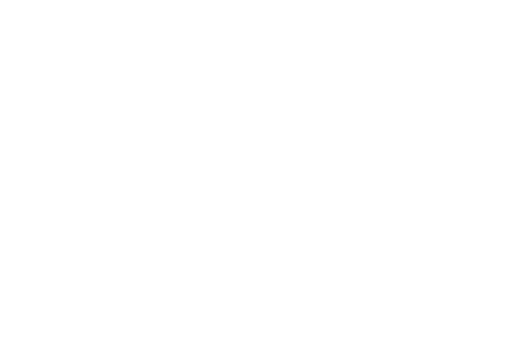

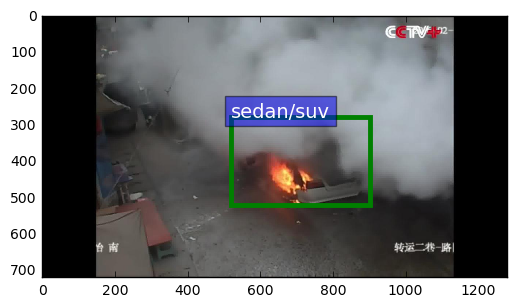

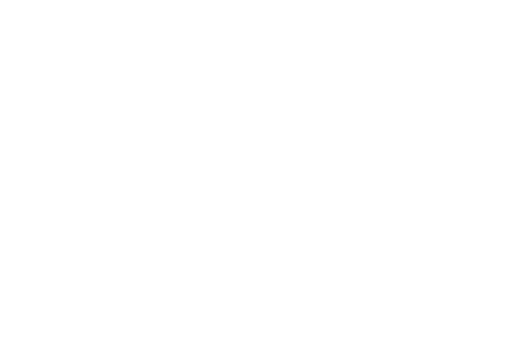

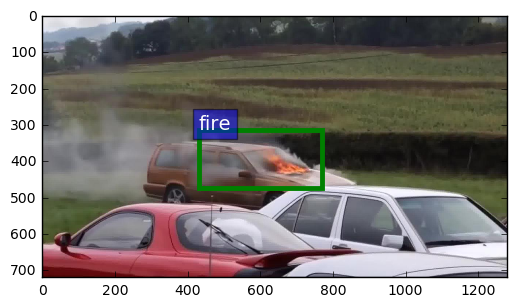

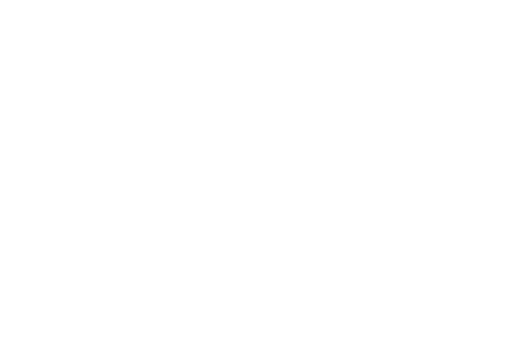

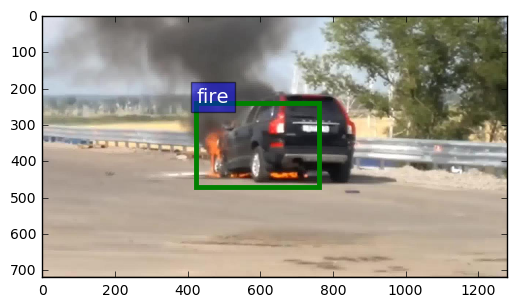

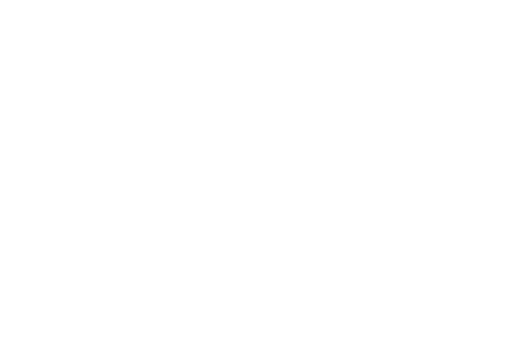

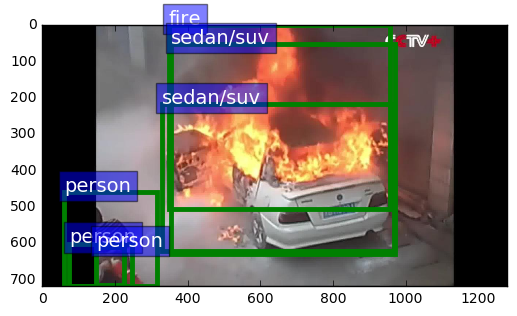

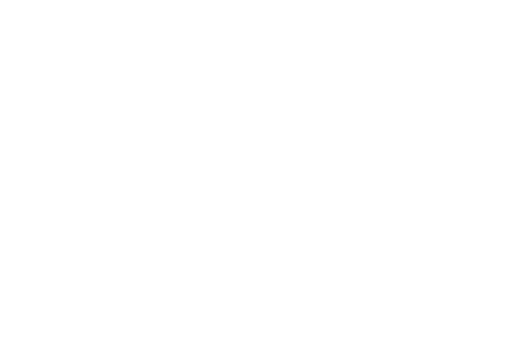

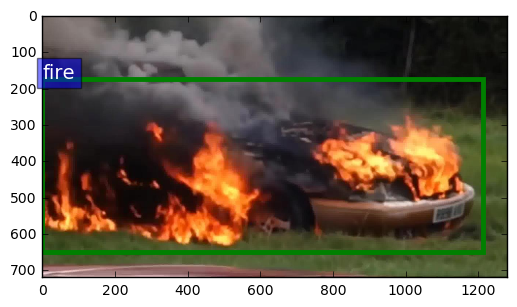

In [11]:
MAIN_CLASSES = TARGET_CLASSES = ["fire","person","car","motorcycle","bus","truck","van","bicycle","pickup","sedan/suv"]


data_name = "fire"
target_data = VaticData(data_name, MAIN_CLASSES)
statistic = show_statistic(target_data, MAIN_CLASSES)
viz_vaitc(target_data, 2500)

In [10]:
print statistic

{'length': 7387, 'main': {'fire': 6994, 'person': 382, 'sedan/suv': 618}}


In [ ]:
from datasets.vatic_hierarchy import VaticData
mapper = {"van":"car", "trailer-head":"truck",\
              "sedan/suv":"car", "scooter":"motorcycle", "bike":"bicycle", "pickup": "car"}  
MAIN_CLASSES = CLASS_SETS['coco']
SUB_CLASSES = CLASS_SETS['vehicle-types']
vatic = VaticData("NCTU_36.MOV", MAIN_CLASSES,SUB_CLASSES, CLS_mapper=mapper)
viz_vaitc_hierarchy(vatic, len(vatic.gt_roidb())-1)